## Capstone 1 - Datawrangling – Predicting Lemon titles (Kicks) in Car Auctions
#### Objective:
> To predict if the car purchased at the auction is a good/bad buy among thousands of cars purchased through online auctions. The goal is to create a machine learning model to predict the condition of the vehicle being purchased at a car auction, if it is a good/bad buy, hence reducing the risk.  

#### Problem:
> Predict if the car being purchased at auction is Good or Bad buy?

#### Outcome:
>One of the challenges for an auto dealership in purchasing a used car at an auction is the risk of that vehicle might have serious issues that prevent it from being resold. These are referred to as “kicks” or unfortunate purchases and are often resulting in a significant loss. Some examples of kicks could be tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller or some unforeseen problem. Using machine learning to predict which cars have higher risk can provide real value to dealerships as they can predict kicks before the dealership buys at auctions.

#### Dataset:
>Source: https://www.kaggle.com/c/DontGetKicked/data

>Train set – 60%<br>
>Test set – 40%

>The data set contains information about each car, like purchase price, make and model, trim level, odometer reading, date of purchase, state of origin and so on. There are about 40 different variables (along with the lemon status indicator IsBadBuy) on around 72K cars, the test data set has the same information on around 40K cars. The target variable is “IsBadBuy” which is a binary variable and is a post-purchase classification for kicked on non-kicked cars.

#### Evaluation Metrics:
>The evaluation metrics for this problem are going to be the Gini Index, Classification Accuracy %, F1 Score, Precision, Recall, and Log Loss metrics.

In [8]:
## Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [9]:
# Input training data
df = pd.read_csv('C:\\Users\\09350\\Documents\\SpringBoard\\MiniProject1\\Capstone1\\EDA\\data\\training.csv')

In [10]:
#peek at the data
df.head()

#Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [11]:
#look at the values for target variable
df['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [12]:
#different types for data in this dataframe
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

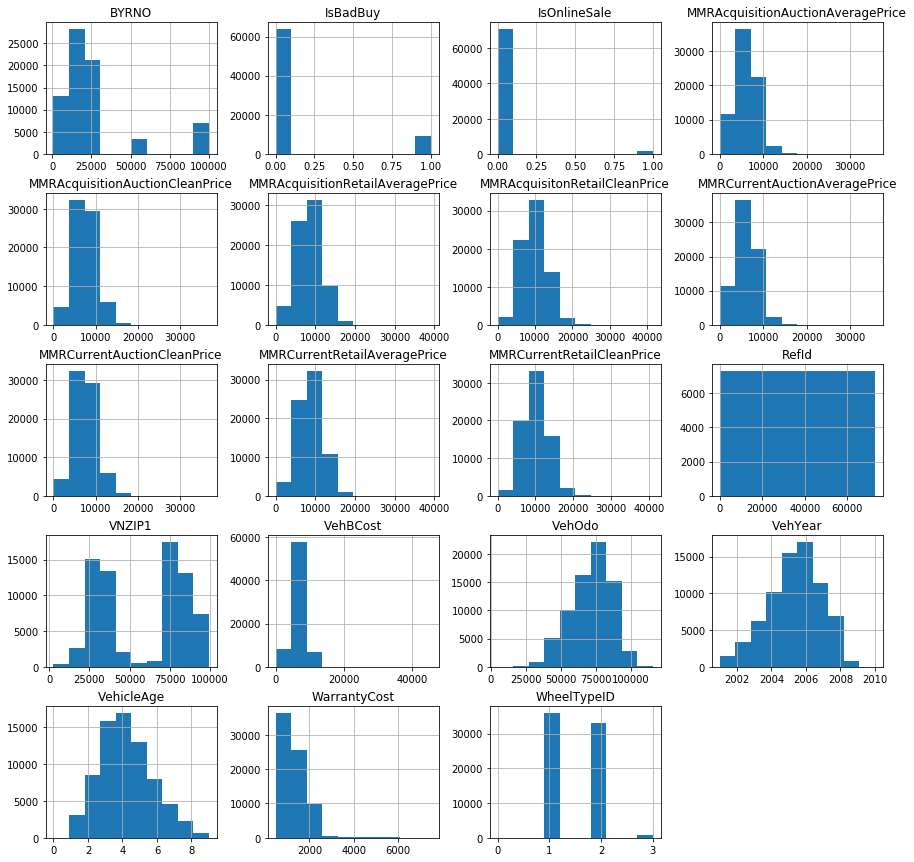

In [13]:
#Visual summary of the variables in the dataframe
pd.DataFrame.hist(df, figsize= [15,15]);

##### Drop columns:
1. Ref ID
2. BYRNO
3. WheelTypeID

##### Numerical Columns:
1.  VehYear
2.  VehcileAge
3.  WarrantyCost
4.  VehOdo
5.  VehBCost
6.  VNZIP1
7.  MMRAcquisitionAuctionAveragePrice
8.  MMRAcquisitionAuctionCleanPrice
9.  MMRAcquisitionRetailAveragePrice
11. MMRAcquisitonRetailCleanPrice
12. MMRCurrentAuctionAveragePrice
13. MMRCurrentAuctionCleanPrice
14. MMRCurrentRetailAveragePrice
15. MMRCurrentRetailCleanPrice

##### Categorical Columns:
1. Auction
2. Transmission
3. WheelType
4. Nationality
5. Size
6. TopThreeAmericanName
7. IsOnlineSale

##### Fix NULLs
1. Trim
2. AUCGUART
3. PRIMEUNIT
4. ALL Price Cols

In [14]:
#Lets looks a a data profiling report using pandas_profiling API
pandas_profiling.ProfileReport(df)

Number of variables,34
Number of observations,72983
Total Missing (%),6.0%
Total size in memory,18.9 MiB
Average record size in memory,272.0 B
Numeric,10
Categorical,15
Boolean,2
Date,0
Text (Unique),0
Rejected,7


In [15]:
df_new_corr = df.copy()
df_new_corr = df_new_corr.drop(['RefId','PurchDate','Auction','Make','Model','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART',
                              'Trim','SubModel','Color','Transmission','WheelType','Nationality','BYRNO','VNST'],axis=1)
correlations = df_new_corr.corr()['IsBadBuy'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 VNZIP1          0.005796
WarrantyCost    0.052319
VehOdo          0.082560
VehicleAge      0.167164
IsBadBuy        1.000000
Name: IsBadBuy, dtype: float64

Most Negative Correlations: 
 VehYear                             -0.158886
MMRAcquisitionAuctionAveragePrice   -0.109252
MMRCurrentAuctionAveragePrice       -0.109112
MMRCurrentAuctionCleanPrice         -0.104020
MMRCurrentRetailAveragePrice        -0.103914
Name: IsBadBuy, dtype: float64


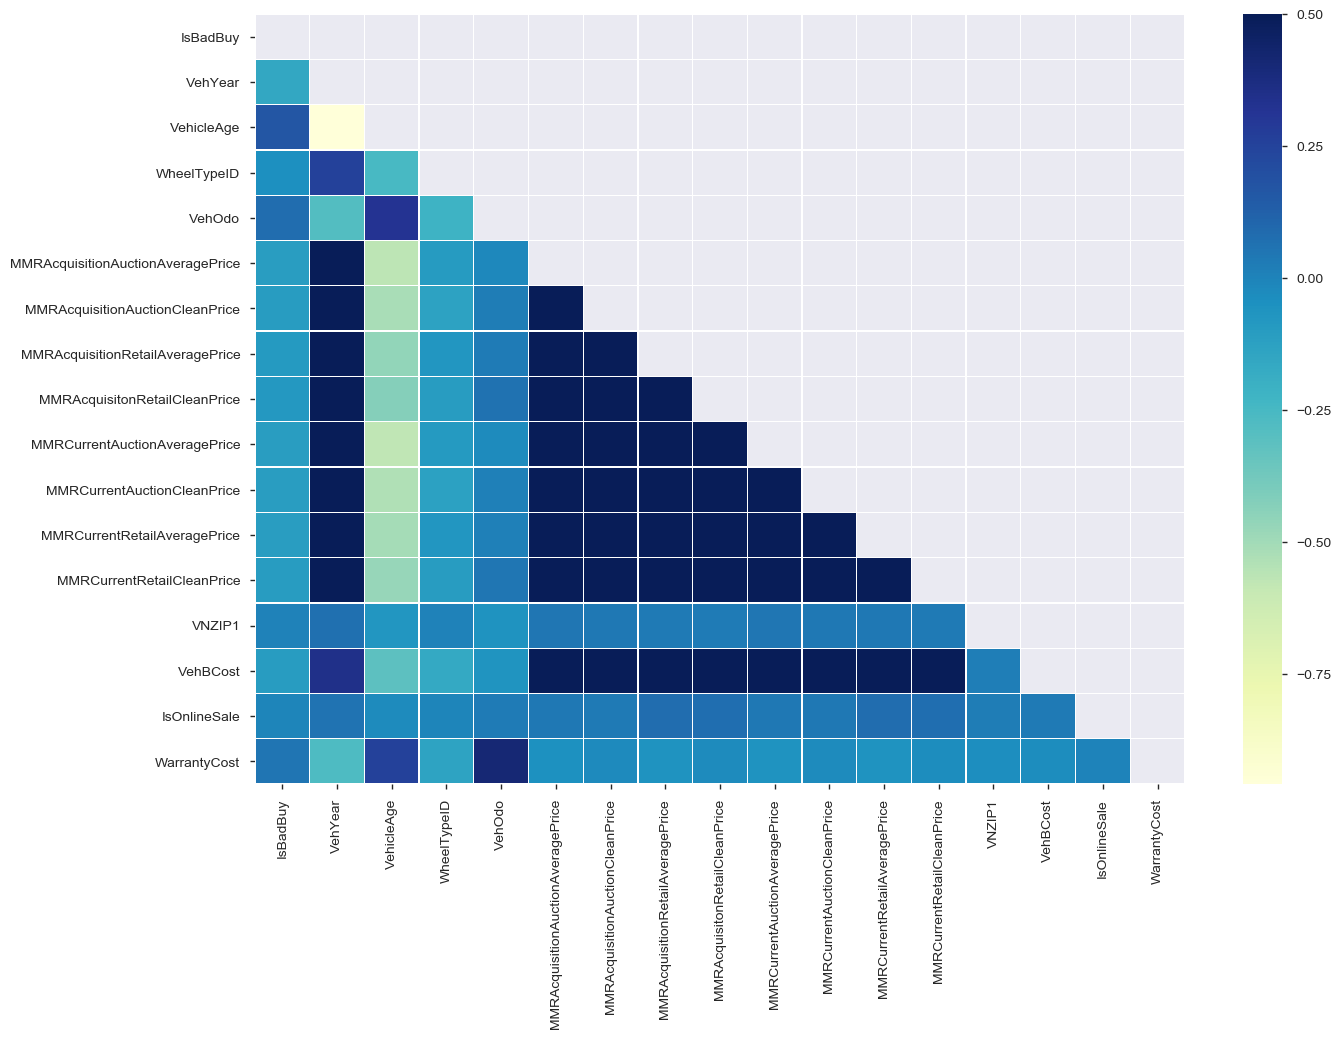

In [16]:
# Calculate correlations
corr = df_new_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

> Dataprocessing
1. Dropping columms

In [17]:
# Dropping columns
df = df.drop(['PRIMEUNIT', 'AUCGUART','RefId'], axis=1)

#dropping the target variable
#df = df.drop('IsBadBuy', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 31 columns):
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationality                          72978 non-null object
Size     

>Has NULL Values:

>1. Trim
>2. AUCGUART
>3. PRIMEUNIT
>4. ALL Price Cols

>Numerical Variables:

>1. VehYear
>2. VehicleAge
>3. VehOdi
>4. VNZIP1
>5. VehCost
>6. All Price Columns

>Categorical Variables:

>1. Auction
>2. Transmission
>3. WheelType
>4. Nationality
>5. Size
>6. TopThreeAmericanName
>7. IsOnlineSale

> The target variable IsBadBuy a binary classifcation variable, meaning we are assigned a value of 1 if the car purchased in a Bad buy or 0 if a car is not a Bad buy (good buy).

> It is important to note that while doing this prediction we need to be careful about the high cost of predicting false negatives. This means that a dealership might think that this car is a good buy and think they would be able to sell it, however in reality this a actually a Bad Buy and not sellable.

> A false postive has a cost associated with it as well, if the purchase as classified as a Bad buy in realilty it is indeed a sellable car, then the delearship might loose the opportunity selling the used car and generating profit of it.

>Quesitons:

>1.There is no column in the Test data provided from the Kaggle Competetion, does this mean that I have to use Cross Validation sampling to split the Training Data into either 5 folds to 10 folds and also how can I know how many number of folds to choose in this case?

>2.WheelType has 3174 / 4.3% missing values Missing
>WheelTypeID has 3169 / 4.3% missing values Missing
>I thought both should have mostly same missing values, but they do not.



>Clarifications:
>1. Auction: This is the expected price of the car at an Auction.
>2. MMR: This is Manheim Market Report, which is an indicator of wholesale prices of a car determined by a very establised company that provides very statistically sounds whole car price determinations.
>3. Acquisition: This is the price at which the car's MMR sold at the auction. 
>4. Retail: This mean the expected price of the car which the customer is willing to pay at the dealership.
>5. VNST and VNZIP1 are state and zip codes
>6. TopAmericanName: If the vechicle is from one of the top three american car manufacturers.

>nearest neighbhors for categorials or look at similar cars look at high correlated variables understand the missing data and then find solutions

In [19]:
#df['Make'].replace(to_replace =['LEXUS','TOYOTA SCION','ACURA','SUZUKI','HONDA','INFINITI','SUBARU','SCION','ISUZU','MAZDA','MITSUBISHI','TOYOTA','NISSAN'],  
#                            value ="JAPANESE",inplace=True)
#df['Make'].replace(to_replace =['CHEVROLET','DODGE','FORD','CHRYSLER','PONTIAC','SATURN','JEEP','MERCURY','BUICK','GMC','OLDSMOBILE','LINCOLN','CADILLAC','PLYMOUTH','HUMMER'],
#                           value ="AMERICAN",inplace=True)
#df['Make'].replace(to_replace =['KIA','HYUNDAI'],
#                           value ="KOREAN",inplace=True)
#df['Make'].replace(to_replace =['VOLKSWAGEN', 'VOLVO', 'MINI'],
#                           value ="EUROPEAN",inplace=True)

In [20]:
df['Make'].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
CADILLAC           33
ACURA              33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
HUMMER              1
TOYOTA SCION        1
Name: Make, dtype: int64

In [21]:
df['Transmission'].replace(to_replace =['Manual'],
                           value ="MANUAL",inplace=True)

In [22]:
df['Transmission'].value_counts()

AUTO      70398
MANUAL     2576
Name: Transmission, dtype: int64

In [23]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

num_df = df.select_dtypes(include=[np.number])

#df_orgin = pd.get_dummies(df_2)

#df_orgin.info()

imputer.fit(num_df)

X = imputer.transform(num_df)

num_df = pd.DataFrame(X, columns=num_df.columns.values)

num_df.head()

num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 18 columns):
IsBadBuy                             72983 non-null float64
VehYear                              72983 non-null float64
VehicleAge                           72983 non-null float64
WheelTypeID                          72983 non-null float64
VehOdo                               72983 non-null float64
MMRAcquisitionAuctionAveragePrice    72983 non-null float64
MMRAcquisitionAuctionCleanPrice      72983 non-null float64
MMRAcquisitionRetailAveragePrice     72983 non-null float64
MMRAcquisitonRetailCleanPrice        72983 non-null float64
MMRCurrentAuctionAveragePrice        72983 non-null float64
MMRCurrentAuctionCleanPrice          72983 non-null float64
MMRCurrentRetailAveragePrice         72983 non-null float64
MMRCurrentRetailCleanPrice           72983 non-null float64
BYRNO                                72983 non-null float64
VNZIP1                               72983 non-null

In [24]:
print(num_df.isnull().sum())

IsBadBuy                             0
VehYear                              0
VehicleAge                           0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64


In [25]:
# All the price columns are related as per the report above.
avg_prices_cols = ['MMRAcquisitionAuctionAveragePrice',
              'MMRAcquisitionAuctionCleanPrice',
              'MMRAcquisitionRetailAveragePrice',
              'MMRAcquisitonRetailCleanPrice',              
              'MMRCurrentAuctionAveragePrice',
              'MMRCurrentAuctionCleanPrice',
              'MMRCurrentRetailAveragePrice',
              'MMRCurrentRetailCleanPrice']

df['AvgAuctionPrice'] = sum(df[i] for i in avg_prices_cols) / len(avg_prices_cols) 
df = df.drop(avg_prices_cols, axis=1)

In [26]:
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,AvgAuctionPrice
0,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,OTHER ASIAN,MEDIUM,OTHER,21973,33619,FL,7100.0,0,1113,10403.625
1,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,AMERICAN,LARGE TRUCK,CHRYSLER,19638,33619,FL,7600.0,0,1053,9943.625
2,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,AMERICAN,MEDIUM,CHRYSLER,19638,33619,FL,4900.0,0,1389,6100.250
3,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,AMERICAN,COMPACT,CHRYSLER,19638,33619,FL,4100.0,0,630,3662.375
4,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,AMERICAN,COMPACT,FORD,19638,33619,FL,4000.0,0,1020,5959.750


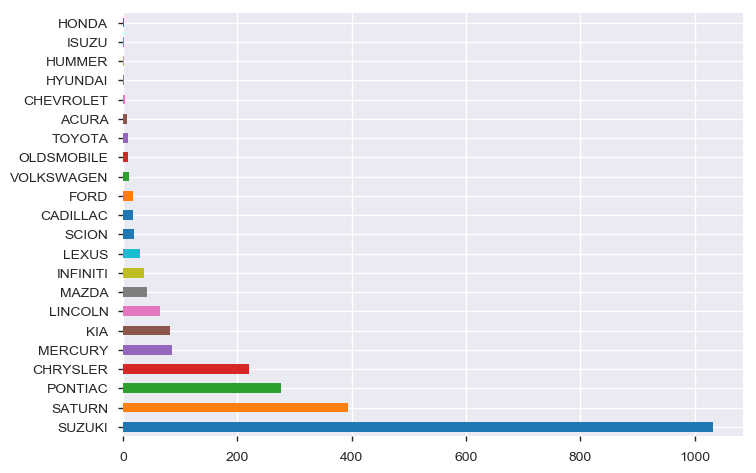

In [27]:
empty_trim_df = df[df['Trim'].isnull()]
empty_trim_df['Make'].value_counts().plot(kind='barh')

In [28]:
# imputing the missing values for categorical values
#cat_cols = ['Auction','Make','Trim','TopThreeAmericanName','Model','SubModel','Color', 
#            'Transmission', 'WheelType','Nationality','Size', 'VNST']
df.head()
print(df['Trim'].isnull().value_counts())

from collections import Counter
def mostcomm(x):
    return x.replace(np.nan, Counter(x).most_common()[0][0])

df['TrimNew'] = df.groupby(('Make','Model','SubModel')).Trim.apply(mostcomm)
df['TrimNew'].isnull().value_counts()

df_tmp = (df.groupby(('Make','Model','SubModel')))
df_tmp[['Make','Model','SubModel','Trim','TrimNew']].head()


df['TrimClean'] = df['Trim'].fillna(df['Trim'].value_counts().index[0])
df['TrimClean'].isnull().value_counts()
df = df.drop(['Trim','TrimNew'], axis=1)

False    70623
True      2360
Name: Trim, dtype: int64


C:\Anaconda_3_7\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda_3_7\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [29]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 13 columns):
PurchDate               72983 non-null object
Auction                 72983 non-null object
Make                    72983 non-null object
Model                   72983 non-null object
SubModel                72975 non-null object
Color                   72975 non-null object
Transmission            72974 non-null object
WheelType               69809 non-null object
Nationality             72978 non-null object
Size                    72978 non-null object
TopThreeAmericanName    72978 non-null object
VNST                    72983 non-null object
TrimClean               72983 non-null object
dtypes: object(13)
memory usage: 7.2+ MB


In [30]:
#Checking the values before imputing WheelType values
print("Before Imputing WheelType\n")
print(obj_df['WheelType'].value_counts(dropna=False))
print("\n")

#Replacing with mode of WheelType
obj_df['WheelType'] = obj_df['WheelType'].transform(lambda x: x.fillna(x.mode()[0]))
obj_df['SubModel'] = obj_df['SubModel'].transform(lambda x: x.fillna(x.mode()[0]))
obj_df['Color'] = obj_df['Color'].transform(lambda x: x.fillna(x.mode()[0]))
obj_df['Size'] = obj_df['Size'].transform(lambda x: x.fillna(x.mode()[0]))
obj_df['Nationality'] = obj_df['Nationality'].transform(lambda x: x.fillna(x.mode()[0]))
obj_df['TopThreeAmericanName'] = obj_df['TopThreeAmericanName'].transform(lambda x: x.fillna(x.mode()[0]))

#Checking the values after imputing the WheelType values
#print("After Imputing WheelType\n")
#print(obj_df['WheelType'].value_counts(dropna=False))
#obj_df.groupby(['WheelType']).size().plot.barh(x="WheelType",y="Vehicle Counts")

Before Imputing WheelType

Alloy      36050
Covers     33004
NaN         3174
Special      755
Name: WheelType, dtype: int64




In [31]:
obj_df.info()

#clean_df = pd.concat([num_df],[obj_df], axis=1, join='inner')
clean_df = pd.concat([num_df, obj_df],axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 13 columns):
PurchDate               72983 non-null object
Auction                 72983 non-null object
Make                    72983 non-null object
Model                   72983 non-null object
SubModel                72983 non-null object
Color                   72983 non-null object
Transmission            72974 non-null object
WheelType               72983 non-null object
Nationality             72983 non-null object
Size                    72983 non-null object
TopThreeAmericanName    72983 non-null object
VNST                    72983 non-null object
TrimClean               72983 non-null object
dtypes: object(13)
memory usage: 7.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 31 columns):
IsBadBuy                             72983 non-null float64
VehYear                              72983 non-null float64
VehicleAge             

In [32]:
#Lets looks a a data profiling report using pandas_profiling API
pandas_profiling.ProfileReport(clean_df)

Number of variables,31
Number of observations,72983
Total Missing (%),0.0%
Total size in memory,17.3 MiB
Average record size in memory,248.0 B
Numeric,9
Categorical,13
Boolean,2
Date,0
Text (Unique),0
Rejected,7


### Class Imbalance - Upsampling

In [33]:
#Import package
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = clean_df[clean_df.IsBadBuy==0]
df_minority = clean_df[clean_df.IsBadBuy==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=64007,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.IsBadBuy.value_counts()

1.0    64007
0.0    64007
Name: IsBadBuy, dtype: int64

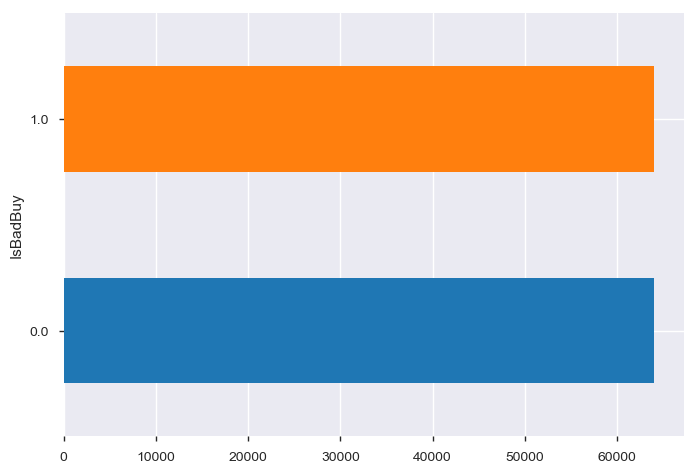

In [34]:
df_grpd_upsam = df_upsampled.groupby(['IsBadBuy']).size().plot.barh(x="IsBadBuy",y="Vehicle Counts")